## 피어슨 상관계수(Pearson correlation)
두 연속형 변수 사이의 ‘선형 관계’가 얼마나 강한지(-1~1) 보는 지표

개념설명
- 값 범위는 -1 ~ 1이다.
- 1이면 완전한 양의 선형 관계, -1이면 완전한 음의 선형 관계, 0이면 선형 관계가 없다는 뜻이다.
- “선형”을 보는 거라서 **관계가 곡선(비선형)**이면 잘 맞지 않는다.

예시설명
- 공부시간(X)과 시험점수(Y) 관계가 직선 느낌이면 피어슨을 쓴다.
- 키(X)와 몸무게(Y)가 대체로 함께 증가하는지 볼 때.

피어슨 상관계수: 0.8642702080660165


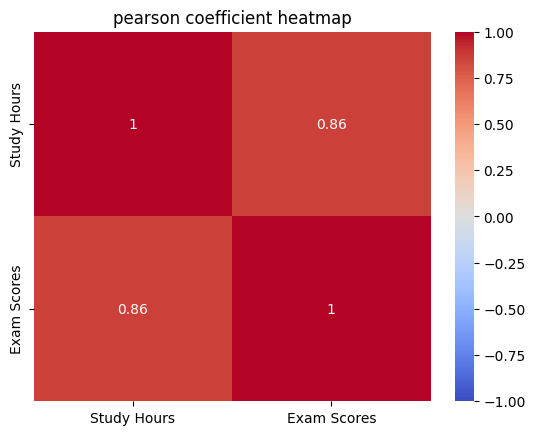

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 예시 데이터 생성
np.random.seed(0)
study_hours = np.random.rand(100) * 10
exam_scores = 3 * study_hours + np.random.randn(100) * 5

# 데이터프레임 생성
df = pd.DataFrame({'Study Hours': study_hours, 'Exam Scores': exam_scores})

# 피어슨 상관계수 계산
pearson_corr, _ = pearsonr(df['Study Hours'], df['Exam Scores'])
print(f"피어슨 상관계수: {pearson_corr}")

# 상관관계 히트맵 시각화
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('pearson coefficient heatmap')
plt.show()

## 비모수 상관계수(Non-parametric correlation)
정규분포 같은 가정을 못 하거나, 순서형 데이터일 때 쓰는 상관계수다.

개념설명
- 데이터 분포에 대한 강한 가정 없이 “상관”을 보고 싶을 때 쓴다.
- 대표적으로 스피어만, 켄달의 타우가 있다.

예시설명
- 설문 만족도(1~5점)처럼 순서만 중요한 데이터의 상관을 보고 싶을 때.
- 분포가 찌그러져서 피어슨을 쓰기 애매할 때.

### 스피어만 상관계수(Spearman)
두 변수의 ‘순위(rank)’가 얼마나 같이 움직이는지 보는 상관계수다.

개념설명
- 값 자체보다 “순서”의 일관성을 본다.
- 켄달 타우보다 데이터 내 편차/에러에 민감하다고 했다.

예시설명
- 성적 순위와 공부시간 순위가 비슷하게 가는지 확인.
- 키 순위와 몸무게 순위가 같이 올라가는지 확인.

### 켄달의 타우(Kendall’s tau)
순위가 ‘일치하는 쌍’과 ‘불일치하는 쌍’ 비율로 상관을 계산한다.

개념설명
- 두 사람(또는 두 관측치)을 비교했을 때
    - 키도 더 크고 몸무게도 더 많다 → 일치 쌍
    - 키는 더 큰데 몸무게는 더 적다 → 불일치 쌍
    - 이런 쌍들의 비율로 상관을 만든다.

예시설명
- 키-몸무게 데이터에서 “일치/불일치”가 많은지로 상관을 본다.
- 순위 기반 관계를 더 안정적으로 보고 싶을 때 사용.

스피어만 상관계수: 0.8663546354635462
켄달의 타우 상관계수: 0.6690909090909092


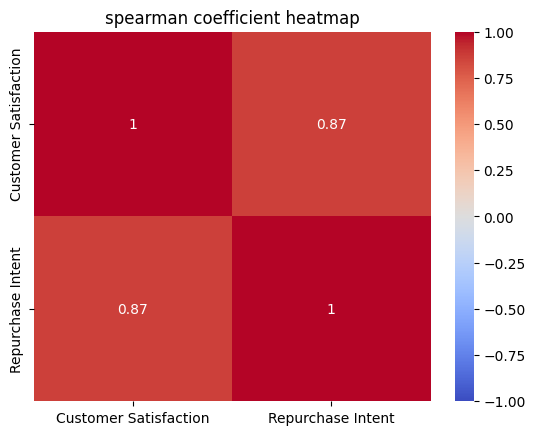

In [2]:
from scipy.stats import spearmanr, kendalltau

# 예시 데이터 생성
np.random.seed(0)
customer_satisfaction = np.random.rand(100)
repurchase_intent = 3 * customer_satisfaction + np.random.randn(100) * 0.5

# 데이터프레임 생성
df = pd.DataFrame({'Customer Satisfaction': customer_satisfaction, 'Repurchase Intent': repurchase_intent})

# 스피어만 상관계수 계산
spearman_corr, _ = spearmanr(df['Customer Satisfaction'], df['Repurchase Intent'])
print(f"스피어만 상관계수: {spearman_corr}")

# 켄달의 타우 상관계수 계산
kendall_corr, _ = kendalltau(df['Customer Satisfaction'], df['Repurchase Intent'])
print(f"켄달의 타우 상관계수: {kendall_corr}")

# 상관관계 히트맵 시각화
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('spearman coefficient heatmap')
plt.show()


## 상호정보 상관계수(Mutual Information)
두 변수가 서로 얼마나 ‘정보적으로 의존’하는지로 관계를 측정해, 비선형 관계도 잡을 수 있다.

개념설명
- 선형만 보는 게 아니라, 변수 간 의존성(정보 공유 정도)을 본다.
- 비선형/복잡한 관계 탐지에 쓸 수 있고, 범주형 데이터에도 적용 가능하다고 했다.

예시설명
- 두 변수가 곡선 관계인데 피어슨이 0에 가깝게 나오는 경우를 잡고 싶을 때.
- 범주형 변수끼리도 “관계가 있나?”를 보고 싶을 때.

In [3]:
import numpy as np
from sklearn.metrics import mutual_info_score

# 범주형 예제 데이터
X = np.array(['cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat'])
Y = np.array(['high', 'low', 'high', 'high', 'low', 'low', 'high', 'low', 'low', 'high'])

# 상호 정보량 계산
mi = mutual_info_score(X, Y)
print(f"Mutual Information (categorical): {mi}")

Mutual Information (categorical): 0.6931471805599456


# 문제풀이

1. 피어슨 상관계수(Pearson correlation coefficient)의 의미를 설명하세요.
    1) 두 변수 간의 비선형 관계를 측정한다.
    2) 두 변수 간의 선형 관계를 측정한다.
    3) 두 변수 간의 독립성을 측정한다.
    4) 두 변수 간의 비모수 관계를 측정한다.

2번: 두 연속형 변수 간의 선형(직선) 관계 강도를 -1~1 범위로 측정한다.


2. 비모수 상관계수(non-parametric correlation coefficient)의 대표적인 예로 옳지 않은 것을 고르세요.
    1) 피어슨 상관계수
    2) 스피어만 상관계수
    3) 켄달의 타우 상관계수
    4) 정답 없음

1번: 모수 상관계수 대표는 스피어만, 켄달 타우

3. 상호정보(Mutual Information) 상관계수의 의미를 설명하는 것을 모두 고르세요.
    1) 두 변수 간의 선형 관계를 측정한다.
    2) 두 변수 간의 비선형 관계를 측정한다.
    3) 두 변수 간의 상호 정보를 측정한다.
    4) 두 변수 간의 독립성을 측정한다.


2번, 3번 : 상호정보는 두 변수의 변수 간 의존성(정보 공유 정도) 측정해 비선형 관계도를 탐지한다.